## Indice Gini 
#### (Metrica per costruire albero di classificazione)

In [1]:
#creo

def Gini():
 a=float(input('sopravvissuti 1: '))
 b=float(input('deceduti 1: '))
 c=float(input('sopravvissuti 2: '))
 d=float(input('deceduti 2: '))
 gini1=1-(a/(a+b))*(a/(a+b))-(b/(a+b))*(b/(a+b))
 gini2=1-(c/(c+d))*(c/(c+d))-(d/(c+d))*(d/(c+d))
 gini=gini1*((a+b)/(a+b+c+d))+gini2*((c+d)/(a+b+c+d))
 purdat=1-(((a+c)/(a+b+c+d))*((a+c)/(a+b+c+d)))-(((b+d)/(a+b+c+d))*((b+d)/(a+b+c+d
)))
 print('\nindice di gini 1: ',gini1)
 print('indice di gini 2: ',gini2)
 print('\nindice gini: ',gini)
 print('purezza dataset: ',purdat)


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\data science - oz\titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
#sopravvissuti male/female

df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
Gini()

sopravvissuti 1: 233
deceduti 1: 81
sopravvissuti 2: 109
deceduti 2: 468

indice di gini 1:  0.3828350034484158
indice di gini 2:  0.3064437162277842

indice gini:  0.3333650003885904
purezza dataset:  0.47301295786144276


In [9]:
#creo colonna maggiori/minori 18anni

df['magg']=df['Age']>=18

In [10]:
df.magg.value_counts()

True     601
False    290
Name: magg, dtype: int64

In [11]:
#sopravvissuti >18/<18

df.groupby('magg')['Survived'].value_counts()

magg   Survived
False  0           177
       1           113
True   0           372
       1           229
Name: Survived, dtype: int64

In [12]:
Gini()

sopravvissuti 1: 113
deceduti 1: 177
sopravvissuti 2: 229
deceduti 2: 372

indice di gini 1:  0.4756480380499406
indice di gini 2:  0.47169304625402475

indice gini:  0.4729803050877123
purezza dataset:  0.47301295786144276


In [13]:
#indice Gini < è il piu determinante (Sex)

In [14]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
#modifico male/female in 1/2

df.Sex=df.Sex.map({'male':1,'female':0})

In [16]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [17]:
#elimino valori mancanti Age

df.dropna(subset=['Age'],inplace=True)

In [18]:
#sopravvissuti by age,sex,classe con DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
treeclf=DecisionTreeClassifier(max_depth=3,random_state=1)

ft=['Age','Sex','Pclass']
x=df[ft]
y=df['Survived']
treeclf.fit(x,y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [19]:
#importanza delle caratteristiche

pd.DataFrame({'ft':ft,'imp':treeclf.feature_importances_}).sort_values('imp',ascending=False)

,ft,imp
1,Sex,0.629067
2,Pclass,0.273674
0,Age,0.097259


In [20]:
#Sex è la caratteristica più importante
#importanza=differenza tr media e indice Gini per ogni variabile

In [21]:
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [22]:
gr=pd.DataFrame({'ft':ft,'imp':treeclf.feature_importances_}).sort_values('imp',ascending=False)

fig=go.Figure(go.Bar(x=gr.ft,y=gr.imp,marker_color='darkturquoise'))
fig.update_layout(title='Importance',plot_bgcolor='white')
fig.update_xaxes(showline=True,linewidth=1,linecolor='darkgrey',gridcolor='lightgrey',gridwidth=1)
fig.update_yaxes(showline=True,linewidth=1,linecolor='darkgrey',gridcolor='lightgrey',gridwidth=1)
fig.show()

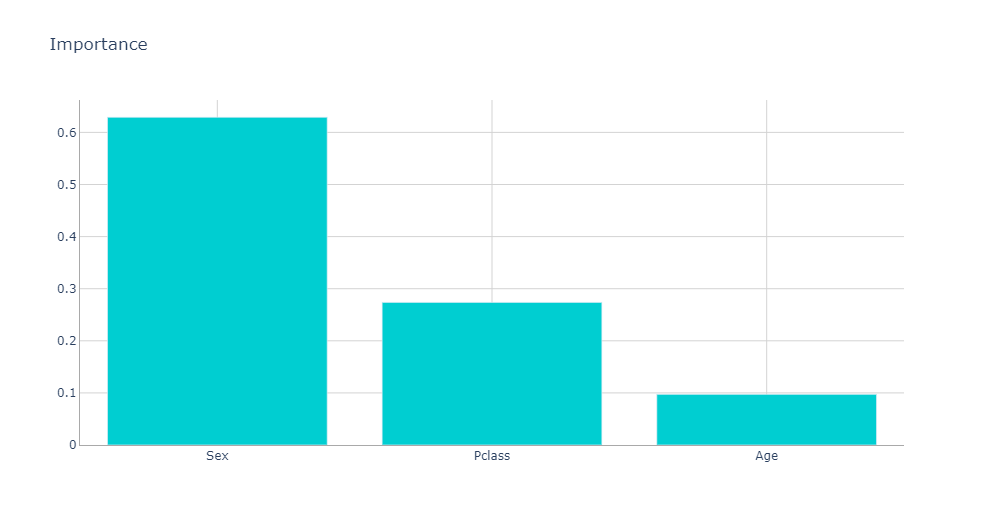

In [23]:
df.corr().loc['Survived',ft]

Age      -0.077221
Sex      -0.538826
Pclass   -0.359653
Name: Survived, dtype: float64